In [1]:
import os
import pandas as pd
import shutil

# Base path containing the folders with disease-specific images and metadata
base_path = r"C:\Users\ayush\Desktop\disease\Skin Disease Dataset\train"

# List of subfolders (diseases) to be merged (choose only 4)
disease_folders = [
    "actinic keratosis train",
    "basal cell carcinoma train",
    "melanoma train",
    "squamous cell carcinoma train"  # New selection
]

# Initialize an empty DataFrame for the merged metadata
merged_metadata = pd.DataFrame()

# Output folder to copy all images into one place
output_images_path = os.path.join(base_path, "4_diagnosis")
os.makedirs(output_images_path, exist_ok=True)

# Loop through each folder, merge metadata, and copy images
for folder in disease_folders:
    folder_path = os.path.join(base_path, folder)
    
    # Read the metadata CSV file from the folder
    metadata_file = os.path.join(folder_path, "train_metadata.csv")
    if os.path.exists(metadata_file):
        metadata_df = pd.read_csv(metadata_file)
        
        # Merge the metadata into the overall DataFrame
        merged_metadata = pd.concat([merged_metadata, metadata_df], ignore_index=True)
        
        # Copy images to the output folder
        for isic_id in metadata_df['isic_id']:
            image_file = os.path.join(folder_path, f"{isic_id}.jpg")
            if os.path.exists(image_file):
                shutil.copy(image_file, output_images_path)

# Save the merged metadata inside the "4_diagnosis" folder
merged_metadata_output = os.path.join(output_images_path, "merged_train_metadata.csv")
merged_metadata.to_csv(merged_metadata_output, index=False)

print(f"Merged metadata saved to: {merged_metadata_output}")
print(f"All images copied to: {output_images_path}")


Merged metadata saved to: C:\Users\ayush\Desktop\disease\Skin Disease Dataset\train\4_diagnosis\merged_train_metadata.csv
All images copied to: C:\Users\ayush\Desktop\disease\Skin Disease Dataset\train\4_diagnosis


In [2]:
import os
import pandas as pd
import shutil

# Base path containing the folders with disease-specific images and metadata for the test set
base_path = r"C:\Users\ayush\Desktop\disease\Skin Disease Dataset\test"

# List of subfolders (diseases) to be merged for the test set
disease_folders = [
    "actinic keratosis test",
    "basal cell carcinoma test",
    "melanoma test",
    "squamous cell carcinoma test"  # New selection
]

# Initialize an empty DataFrame for the merged metadata
merged_metadata = pd.DataFrame()

# Output folder to copy all images into one place for the test set
output_images_path = os.path.join(base_path, "4_diagnosis")
os.makedirs(output_images_path, exist_ok=True)

# Loop through each folder, merge metadata, and copy images
for folder in disease_folders:
    folder_path = os.path.join(base_path, folder)
    
    # Read the metadata CSV file from the folder
    metadata_file = os.path.join(folder_path, "test_metadata.csv")
    if os.path.exists(metadata_file):
        metadata_df = pd.read_csv(metadata_file)
        
        # Merge the metadata into the overall DataFrame
        merged_metadata = pd.concat([merged_metadata, metadata_df], ignore_index=True)
        
        # Copy images to the output folder
        for isic_id in metadata_df['isic_id']:
            image_file = os.path.join(folder_path, f"{isic_id}.jpg")
            if os.path.exists(image_file):
                shutil.copy(image_file, output_images_path)

# Save the merged metadata inside the "4_diagnosis" folder for the test set
merged_metadata_output = os.path.join(output_images_path, "merged_test_metadata.csv")
merged_metadata.to_csv(merged_metadata_output, index=False)

print(f"Merged metadata saved to: {merged_metadata_output}")
print(f"All test images copied to: {output_images_path}")


Merged metadata saved to: C:\Users\ayush\Desktop\disease\Skin Disease Dataset\test\4_diagnosis\merged_test_metadata.csv
All test images copied to: C:\Users\ayush\Desktop\disease\Skin Disease Dataset\test\4_diagnosis


In [57]:
pip install --upgrade timm


     ---------------------------------------- 0.0/48.4 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.4 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.4 kB ? eta -:--:--
     ---------------- --------------------- 20.5/48.4 kB 110.1 kB/s eta 0:00:01
     ---------------- --------------------- 20.5/48.4 kB 110.1 kB/s eta 0:00:01
     ---------------- --------------------- 20.5/48.4 kB 110.1 kB/s eta 0:00:01
     -------------------------------------- 48.4/48.4 kB 143.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB 5.7 MB/s eta 0:00:01
   ----------- ---------------------------- 0.7/2.3 MB 7.0 MB/s eta 0:00:01
   ------------------- -------------------- 1.1/2.3 MB 7.8 MB/s eta 0:00:01
   -------------------------- ------------- 1.6/2.3 MB 8.3 MB/s eta 0:00:01
   ----------------------------------- ---- 2.1/2.3 MB 8.8 MB/s eta 0:00:01
   ----------

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"



In [3]:
import torch

# Check CUDA version
print(torch.version.cuda)  # Should output '12.6'

# Check if CUDA is available
print(torch.cuda.is_available())  # Should return True if CUDA is detected

# Check the GPU device name
print(torch.cuda.get_device_name(0))  # Should return 'NVIDIA GeForce RTX 3070 Ti'


11.8
True
NVIDIA GeForce RTX 3070 Ti Laptop GPU


In [4]:
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.optim as optim
from torch import nn

# Define the custom dataset class
class SkinDiseaseDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the CSV file with metadata.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        # Load the CSV and filter only the relevant columns
        self.metadata = pd.read_csv(csv_file)[['isic_id', 'diagnosis']]  # Keep only isic_id and diagnosis columns
        self.root_dir = root_dir  # Root directory containing images
        self.transform = transform  # Any transformations (resize, normalize, etc.)

        # Create a label mapping (modify based on your actual diagnosis labels)
        self.label_map = {
            'actinic keratosis': 0,
            'melanoma': 1,
            'squamous cell carcinoma': 2,
            'basal cell carcinoma': 3  # Only 4 diagnosis now
        }

    def __len__(self):
        return len(self.metadata)  # Return the size of the dataset

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # Get the isic_id and diagnosis
        img_name = os.path.join(self.root_dir, self.metadata.iloc[idx, 0] + ".jpg")
        image = Image.open(img_name)  # Open the image using PIL
        diagnosis = self.metadata.iloc[idx, 1]  # Fetch the diagnosis column

        # Convert diagnosis to numeric label using the label_map
        try:
            label = self.label_map[diagnosis]
        except KeyError:
            raise ValueError(f"Unknown diagnosis: {diagnosis}")

        # Apply any transformations (resize, normalize, etc.)
        if self.transform:
            image = self.transform(image)

        # Return image and label
        return image, torch.tensor(label)  # Return label as a torch tensor


In [5]:
def get_input_size_for_model(model_name):
    """
    Returns the appropriate input size for the model.

    Args:
        model_name (str): The name of the model (e.g., 'efficientnet_b7', 'seresnext101', 'googlenet', 'nasnet').

    Returns:
        int: The input size (height and width) for the given model.
    """
    if model_name == 'efficientnet_b7':
        return 600  # EfficientNet-B7 expects 600x600 images
    elif model_name == 'seresnext101':
        return 224  # SE-ResNeXt101 expects 224x224 images
    elif model_name == 'googlenet':
        return 224  # GoogleNet expects 224x224 images
    elif model_name == 'nasnet':
        return 331  # NASNet typically expects 331x331 images
    else:
        print(f"Unknown model name '{model_name}'. Defaulting to 224x224 input size.")
        return 224  # Default to 224x224 for any unspecified models


In [6]:
from torchvision import transforms
from torch.utils.data import DataLoader

def get_data_loaders(train_metadata_path, train_image_folder, test_metadata_path, test_image_folder, model_name, batch_size=2, num_workers=4):
    """
    Returns the training and testing DataLoaders with appropriate input size based on the model.
    
    Args:
        model_name (str): The name of the model to be used (e.g., 'efficientnet_b7', 'seresnext101', 'googlenet', 'nasnet').
    """
    input_size = get_input_size_for_model(model_name)  # Get input size based on the model

    # Define transformations based on input size
    data_transforms = transforms.Compose([
        transforms.Resize((input_size, input_size)),  # Resize images according to the model's expected input size
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalization
    ])

    # Create the training dataset instance
    train_dataset = SkinDiseaseDataset(csv_file=train_metadata_path,
                                       root_dir=train_image_folder,
                                       transform=data_transforms)
    
    # Create the test dataset instance
    test_dataset = SkinDiseaseDataset(csv_file=test_metadata_path,
                                      root_dir=test_image_folder,
                                      transform=data_transforms)

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

    return train_loader, test_loader


In [7]:
def train_one_epoch(model, train_loader, optimizer, criterion, device):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Clear gradients
        
        outputs = model(images)
        loss = criterion(outputs, labels)  # Calculate loss
        
        # Check if loss is valid
        if not loss.requires_grad:
            print("Loss does not require gradients, there might be frozen layers.")
        
        loss.backward()  # Backpropagate
        optimizer.step()  # Update weights
        
        running_loss += loss.item()

        with torch.no_grad():
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = running_loss / len(train_loader)  # Calculate average loss
    accuracy = 100 * correct / total  # Calculate accuracy
    return avg_loss, accuracy


In [8]:
def evaluate_model(model, test_loader, criterion, device):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    running_loss = 0.0
    
    with torch.no_grad():  # Disable gradient calculation for validation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_loss = running_loss / len(test_loader)  # Calculate average loss
    accuracy = 100 * correct / total  # Calculate accuracy
    return avg_loss, accuracy


In [68]:
def freeze_model_layers(model, freeze=True, num_unfrozen_layers=2):
    """
    Freezes or unfreezes layers in the model.
    
    Args:
        model: The neural network model (e.g., GoogleNet, DenseNet, ResNet, etc.).
        freeze: Whether to freeze or unfreeze layers. Default is True (freeze).
        num_unfrozen_layers: Number of layers to unfreeze starting from the last layer. Default is 2.
    """
    # Flatten all parameters from the model into a list
    all_layers = list(model.parameters())
    
    if freeze:
        # Freeze all layers by setting requires_grad to False
        for param in all_layers:
            param.requires_grad = False
        print(f"All layers are frozen.")
    else:
        # Unfreeze the last num_unfrozen_layers by setting requires_grad to True
        num_layers_to_unfreeze = num_unfrozen_layers

        # Unfreeze the parameters of the last 'num_unfrozen_layers' layers
        for param in all_layers[-num_layers_to_unfreeze:]:
            param.requires_grad = True

        print(f"Unfroze the last {num_unfrozen_layers} layers for fine-tuning.")


In [84]:
def train_model_with_refreezing(
    model, train_loader, test_loader, optimizer, criterion, device,
    num_epochs=50, unfreeze_epoch=10, refreeze_epoch=30, num_unfrozen_layers=2
):
    test_accuracies = []  # Store test accuracies for each epoch

    # Initially, freeze all layers except the final classification layer
    freeze_model_layers(model, freeze=True)

    # Ensure final classification layer is always trainable
    if hasattr(model, 'classifier'):  # For DenseNet121, EfficientNet, SEDenseNet121
        for param in model.classifier.parameters():
            param.requires_grad = True
    elif hasattr(model, 'fc'):  # For SE-ResNeXt101, GoogleNet
        for param in model.fc.parameters():
            param.requires_grad = True
    elif hasattr(model, 'head'):  # For RegNetY8GFCustom or similar models
        for param in model.head.parameters():
            param.requires_grad = True
    elif isinstance(model, SEDenseNet121):  # Explicitly handle SEDenseNet121
        for param in model.densenet.classifier.parameters():
            param.requires_grad = True
    else:
        raise ValueError(f"Unknown model architecture: {type(model).__name__}")

    for epoch in range(num_epochs):
        start_time = time.time()  # Record start time

        # Unfreeze layers at the specified epoch for fine-tuning
        if epoch == unfreeze_epoch:
            freeze_model_layers(model, freeze=False, num_unfrozen_layers=num_unfrozen_layers)
            
            # Ensure the final classification layer is trainable
            if hasattr(model, 'classifier'):
                for param in model.classifier.parameters():
                    param.requires_grad = True
            elif hasattr(model, 'fc'):
                for param in model.fc.parameters():
                    param.requires_grad = True
            elif hasattr(model, 'head'):
                for param in model.head.parameters():
                    param.requires_grad = True
            elif isinstance(model, SEDenseNet121):  # Handle SEDenseNet121
                for param in model.densenet.classifier.parameters():
                    param.requires_grad = True

            # Reinitialize optimizer to include only parameters of unfrozen layers
            optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001, weight_decay=1e-4)
            print(f"Unfreezing layers at epoch {epoch + 1} for fine-tuning.")

        # Refreeze layers at the specified epoch
        if epoch == refreeze_epoch:
            freeze_model_layers(model, freeze=True)
            
            # Ensure final classification layer is trainable
            if hasattr(model, 'classifier'):
                for param in model.classifier.parameters():
                    param.requires_grad = True
            elif hasattr(model, 'fc'):
                for param in model.fc.parameters():
                    param.requires_grad = True
            elif hasattr(model, 'head'):
                for param in model.head.parameters():
                    param.requires_grad = True
            elif isinstance(model, SEDenseNet121):  # Handle SEDenseNet121
                for param in model.densenet.classifier.parameters():
                    param.requires_grad = True

            # Optionally, decrease learning rate and update optimizer
            optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.00001, weight_decay=1e-4)
            print(f"Refreezing layers at epoch {epoch + 1} to prevent overfitting.")

        # Train for one epoch
        avg_train_loss, train_accuracy = train_one_epoch(model, train_loader, optimizer, criterion, device)

        # Print training metrics
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

        # Evaluate model after each epoch
        avg_test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)
        test_accuracies.append(test_accuracy)  # Store test accuracy for the epoch

        # Calculate time taken for the epoch
        epoch_time = time.time() - start_time

        # Print the test loss and accuracy for this epoch
        print(f"Epoch {epoch+1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%, Time: {epoch_time:.2f} seconds")

    # After training, print test accuracy for each epoch
    print("\nTest Accuracy after each epoch:")
    for epoch, test_acc in enumerate(test_accuracies, start=1):
        print(f"Epoch {epoch}: Test Accuracy: {test_acc:.2f}%")
    
    # Print final training accuracy
    print(f"\nFinal Training Accuracy after {num_epochs} epochs: {train_accuracy:.2f}%")


In [11]:
from sklearn.metrics import classification_report

def evaluate_model_with_metrics(model, test_loader, criterion, device, label_names):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    running_loss = 0.0
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():  # Disable gradient calculation for validation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Store all predictions and labels for metrics
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    avg_loss = running_loss / len(test_loader)  # Calculate average loss
    accuracy = 100 * correct / total  # Calculate accuracy

    # Generate classification report (Precision, Recall, F1-Score)
    report = classification_report(all_labels, all_predictions, target_names=label_names)
    
    return avg_loss, accuracy, report

# Usage:
#label_names = ['actinic keratosis', 'melanoma', 'squamous cell carcinoma', 'basal cell carcinoma']
#avg_loss, accuracy, report = evaluate_model_with_metrics(model, test_loader, criterion, device, label_names)
#print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")
#print(report)


In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, test_loader, device, label_names):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    
    # Plot the confusion matrix with larger figure size and adjusted font size
    plt.figure(figsize=(10, 8))  # Increase figure size
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_names, yticklabels=label_names, annot_kws={"size": 14}, cbar_kws={'label': 'Scale'})  # Change format to 'g' to display values clearly
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Usage:
# label_names = ['actinic keratosis', 'melanoma', 'squamous cell carcinoma', 'basal cell carcinoma']
# plot_confusion_matrix(model, test_loader, device, label_names)


In [13]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

def calculate_roc_auc(model, test_loader, device):
    model.eval()
    all_labels = []
    all_probabilities = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)  # Convert outputs to probabilities
            all_labels.extend(labels.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

    # ROC-AUC score for multi-class classification
    auc_score = roc_auc_score(all_labels, all_probabilities, multi_class="ovr", average=None)  # Compute for each class
    return auc_score


# Usage:
#auc_score = calculate_roc_auc(model, test_loader, device)
#print(f"ROC-AUC Score: {auc_score:.4f}")


In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

def plot_roc_auc(model, test_loader, device, label_names):
    model.eval()
    all_labels = []
    all_probabilities = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probabilities = torch.softmax(outputs, dim=1)  # Convert outputs to probabilities
            all_labels.extend(labels.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())

    # Binarize the labels for ROC AUC computation
    all_labels = label_binarize(all_labels, classes=np.arange(len(label_names)))

    # Compute ROC curve and ROC AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(label_names)):
        fpr[i], tpr[i], _ = roc_curve(all_labels[:, i], np.array(all_probabilities)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    for i in range(len(label_names)):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for {label_names[i]} (area = {roc_auc[i]:.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guessing
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multi-Class Classification')
    plt.legend(loc="lower right")
    plt.show()




In [15]:
import torch.optim as optim

def train_model_finetune(model, train_loader, test_loader, optimizer, criterion, device, num_epochs=50, unfreeze_epoch=10, num_unfrozen_layers=2):
    test_accuracies = []  # To store test accuracies for each epoch

    # Initially, freeze all layers except the final classification layer
    freeze_model_layers(model, freeze=True)

    for epoch in range(num_epochs):
        start_time = time.time()  # Record start time
        
        # Unfreeze layers at the specified epoch for fine-tuning
        if epoch == unfreeze_epoch:
            freeze_model_layers(model, freeze=False, num_unfrozen_layers=num_unfrozen_layers)
            # Reinitialize optimizer to include only parameters of unfrozen layers
            optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001, weight_decay=1e-4)
            print(f"Unfreezing layers at epoch {epoch + 1} for fine-tuning.")

        # Train the model for one epoch
        avg_train_loss, train_accuracy = train_one_epoch(model, train_loader, optimizer, criterion, device)

        # Print training accuracy for the current epoch
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")

        # Evaluate the model after each epoch
        avg_test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)

        # Store test accuracy for this epoch
        test_accuracies.append(test_accuracy)

        # Calculate time taken for the epoch
        epoch_time = time.time() - start_time

        # Print the test loss and accuracy for this epoch
        print(f"Epoch {epoch+1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%, Time: {epoch_time:.2f} seconds")

    # After training is complete, print all test accuracies for each epoch
    print("\nTest Accuracy after each epoch:")
    for epoch, test_acc in enumerate(test_accuracies, start=1):
        print(f"Epoch {epoch}: Test Accuracy: {test_acc:.2f}%")
    
    # Finally, print the training accuracy from the last epoch
    print(f"\nFinal Training Accuracy after {num_epochs} epochs: {train_accuracy:.2f}%")


In [77]:
import torch
from torch import nn
from timm import create_model
from torchvision import models


class GoogleNetCustom(nn.Module):
    def __init__(self, num_classes=4, dropout_rate=0.3):
        super(GoogleNetCustom, self).__init__()
        self.googlenet = models.googlenet(weights=models.GoogLeNet_Weights.IMAGENET1K_V1)
        self.googlenet.fc = nn.Identity()  # Remove the final fully connected layer

        # Add a dropout layer and the final classification layer
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(1024, num_classes)  # GoogleNet outputs 1024 features

    def forward(self, x):
        x = self.googlenet(x)  # Forward pass through GoogleNet
        x = self.dropout(x)  # Apply dropout
        x = self.fc(x)  # Final classification layer
        return x

class SEResNeXt101Custom(nn.Module):
    def __init__(self, num_classes=4):
        super(SEResNeXt101Custom, self).__init__()
        self.seresnext101 = create_model('seresnext101_32x4d', pretrained=True)  # Load pre-trained SE-ResNeXt101
        self.seresnext101.fc = nn.Identity()  # Remove the final fully connected layer

        # Add a dropout layer and the final classification layer
        self.dropout = nn.Dropout(0.3)  # You can adjust the dropout rate
        self.fc = nn.Linear(2048, num_classes)  # SE-ResNeXt101 outputs 2048 features

    def forward(self, x):
        x = self.seresnext101(x)  # Forward pass through SE-ResNeXt101
        x = self.dropout(x)  # Apply dropout
        x = self.fc(x)  # Final classification layer
        return x



class EfficientNetB0Custom(nn.Module):
    def __init__(self, num_classes=4, dropout_rate=0.3):
        super(EfficientNetB0Custom, self).__init__()
        self.efficientnet_b0 = models.efficientnet_b0(pretrained=True)
        self.efficientnet_b0.classifier = nn.Identity()  # Remove the final fully connected layer

        # Add a dropout layer and the final classification layer
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(1280, num_classes)  # EfficientNet-B0 outputs 1280 features

    def forward(self, x):
        x = self.efficientnet_b0(x)  # Forward pass through EfficientNet-B0
        x = self.dropout(x)  # Apply dropout
        x = self.fc(x)  # Final classification layer
        return x
    
    
    
import torch
import torch.optim as optim
from torch import nn
from torchvision import models


class DenseNet121Custom(nn.Module):
    def __init__(self, num_classes=4, dropout_rate=0.3):
        super(DenseNet121Custom, self).__init__()
        # Load pre-trained DenseNet121
        self.densenet = models.densenet121(pretrained=True)

        # Remove the final classifier layer and add custom layers
        self.densenet.classifier = nn.Identity()  # Remove the final fully connected layer

        # Add a dropout layer and a new fully connected layer for classification
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(1024, num_classes)  # DenseNet-121 outputs 1024 features

    def forward(self, x):
        # Forward pass through DenseNet-121 feature extractor
        x = self.densenet.features(x)
        x = torch.flatten(x, 1)  # Flatten the output
        x = self.dropout(x)  # Apply dropout
        x = self.fc(x)  # Final classification layer
        return x



class SEDenseNet121(nn.Module):
    def __init__(self, num_classes=4):
        super(SEDenseNet121, self).__init__()
        # Load pre-trained DenseNet121
        self.densenet = models.densenet121(pretrained=True)
        
        # Add SE layers (assuming SE is already implemented, or use SENet package)
        self.se_layer = nn.Sequential(
            nn.AdaptiveAvgPool2d(1), 
            nn.Conv2d(1024, 1024 // 16, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024 // 16, 1024, kernel_size=1),
            nn.Sigmoid()
        )
        
        # Replace classifier
        self.densenet.classifier = nn.Linear(1024, num_classes)

        # AdaptiveAvgPool to make sure the input to classifier is correct
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        x = self.densenet.features(x)  # Forward through the densenet layers
        x = self.se_layer(x) * x  # Apply SE layers

        # Adaptive pooling to match input size for the classifier
        x = self.adaptive_pool(x)
        x = torch.flatten(x, 1)  # Flatten the output for the classifier

        # Pass through the final classifier
        x = self.densenet.classifier(x)
        return x



import timm
import torch.nn as nn

class RegNetY8GFCustom(nn.Module):
    def __init__(self, num_classes=4, dropout_rate=0.3):
        super(RegNetY8GFCustom, self).__init__()
        # Load the RegNetY_008 model from timm
        self.regnety = timm.create_model('regnety_008', pretrained=True)
        
        # Remove the final fully connected layer (if it exists)
        self.regnety.fc = nn.Identity()  # or self.regnety.head.fc = nn.Identity() if needed
        
        # Dropout and new fully connected layer for classification
        self.dropout = nn.Dropout(dropout_rate)
        
        # Match the fc layer's input size to the flattened output size of RegNetY_008
        self.fc = nn.Linear(37632, num_classes)  # Update 37632 to match the flattened size after RegNetY_008

    def forward(self, x):
        x = self.regnety.forward_features(x)  # Extract features
        x = x.view(x.size(0), -1)  # Flatten the output from (batch_size, channels, height, width) to (batch_size, flattened_size)
        x = self.dropout(x)
        x = self.fc(x)  # Fully connected layer for classification
        return x



In [17]:

# 3. Set up the correct paths for your dataset
train_metadata_path = r"C:\Users\ayush\Desktop\disease\Skin Disease Dataset\train\4_diagnosis\merged_train_metadata.csv"
train_image_folder = r"C:\Users\ayush\Desktop\disease\Skin Disease Dataset\train\4_diagnosis"
test_metadata_path = r"C:\Users\ayush\Desktop\disease\Skin Disease Dataset\test\4_diagnosis\merged_test_metadata.csv"
test_image_folder = r"C:\Users\ayush\Desktop\disease\Skin Disease Dataset\test\4_diagnosis"

In [150]:
import torch
import torch.optim as optim
from torch import nn

# 1. Initialize the GoogleNet model
num_classes = 4  # Only 4 classes: actinic keratosis, melanoma, squamous cell carcinoma, basal cell carcinoma
model_name = 'googlenet'

# Initialize the custom GoogleNet model with dropout
model = GoogleNetCustom(num_classes=num_classes)

# Move the model to the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 2. Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss is typically used for multi-class classification
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001, weight_decay=1e-4)

In [78]:
import time


# 4. Create data loaders using the correct paths
train_loader, test_loader = get_data_loaders(
    train_metadata_path=train_metadata_path,
    train_image_folder=train_image_folder,
    test_metadata_path=test_metadata_path,
    test_image_folder=test_image_folder,
    model_name=model_name,
    batch_size=32,  # You can adjust the batch size as needed
    num_workers=0
)

# 5. Train the model using the fine-tuning function (train_model_with_refreezing)
# Fine-tune after 10 epochs, and refreeze at 30 epochs if needed
train_model_with_refreezing(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=50,  # Total number of epochs
    unfreeze_epoch=10,  # Unfreeze layers starting at epoch 10
    refreeze_epoch=30,  # Refreeze layers at epoch 30 to avoid overfitting
    num_unfrozen_layers=4  # Fine-tune the last 2 layers
)


All layers are frozen.


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [156]:
import torch
import torch.optim as optim
from torch import nn

# Initialize the GoogleNet model
num_classes = 4  # Only 4 classes: actinic keratosis, melanoma, squamous cell carcinoma, basal cell carcinoma
model_name = 'googlenet'

# Initialize the custom GoogleNet model with dropout
model = GoogleNetCustom(num_classes=num_classes)

# Move the model to the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Ensure that the final classification layer is always trainable
for param in model.fc.parameters():
    param.requires_grad = True

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss is typically used for multi-class classification

# Initialize the optimizer
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001, weight_decay=1e-4)

# Helper functions for data loading, freezing layers, and training are assumed to be already defined

# Create data loaders using the correct paths
train_loader, test_loader = get_data_loaders(
    train_metadata_path=train_metadata_path,
    train_image_folder=train_image_folder,
    test_metadata_path=test_metadata_path,
    test_image_folder=test_image_folder,
    model_name=model_name,
    batch_size=32,  # You can adjust the batch size as needed
    num_workers=0
)

# Train the model using the fine-tuning function
train_model_with_refreezing(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=50,  # Total number of epochs
    unfreeze_epoch=10,  # Unfreeze layers starting at epoch 10
    refreeze_epoch=30,  # Refreeze layers at epoch 30 to avoid overfitting
    num_unfrozen_layers=4  # Fine-tune the last 4 layers
)



All layers are frozen.
Epoch 1/50, Train Loss: 1.3870, Train Accuracy: 28.92%
Epoch 1/50, Test Loss: 1.3466, Test Accuracy: 35.00%, Time: 187.35 seconds
Epoch 2/50, Train Loss: 1.3429, Train Accuracy: 34.56%
Epoch 2/50, Test Loss: 1.3094, Test Accuracy: 39.72%, Time: 197.46 seconds
Epoch 3/50, Train Loss: 1.3027, Train Accuracy: 38.61%
Epoch 3/50, Test Loss: 1.2765, Test Accuracy: 43.89%, Time: 197.85 seconds
Epoch 4/50, Train Loss: 1.2783, Train Accuracy: 41.47%
Epoch 4/50, Test Loss: 1.2538, Test Accuracy: 46.81%, Time: 200.66 seconds
Epoch 5/50, Train Loss: 1.2507, Train Accuracy: 43.89%
Epoch 5/50, Test Loss: 1.2392, Test Accuracy: 47.50%, Time: 197.38 seconds
Epoch 6/50, Train Loss: 1.2315, Train Accuracy: 45.75%
Epoch 6/50, Test Loss: 1.2209, Test Accuracy: 47.92%, Time: 203.73 seconds
Epoch 7/50, Train Loss: 1.2232, Train Accuracy: 46.36%
Epoch 7/50, Test Loss: 1.2114, Test Accuracy: 48.06%, Time: 206.79 seconds
Epoch 8/50, Train Loss: 1.2096, Train Accuracy: 47.11%
Epoch 8/50, 

In [157]:

label_names = ['actinic keratosis', 'melanoma', 'squamous cell carcinoma', 'basal cell carcinoma']
avg_loss, accuracy, report = evaluate_model_with_metrics(model, test_loader, criterion, device, label_names)
print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")
print(report)

Test Loss: 1.1763, Test Accuracy: 69.72%
                         precision    recall  f1-score   support

      actinic keratosis       0.69      0.61      0.65       180
               melanoma       0.78      0.78      0.78       180
squamous cell carcinoma       0.64      0.63      0.64       180
   basal cell carcinoma       0.68      0.76      0.72       180

               accuracy                           0.70       720
              macro avg       0.70      0.70      0.70       720
           weighted avg       0.70      0.70      0.70       720



In [179]:
auc_score = calculate_roc_auc(model, test_loader, device)
print(f"ROC-AUC Score: {auc_score:.4f}")


TypeError: unsupported format string passed to tuple.__format__

In [187]:
# Calculate AUC
auc_score = calculate_roc_auc(model, test_loader, device)

# Print individual AUC scores for each class
for i, label_name in enumerate(label_names):
    print(f"ROC-AUC Score for {label_name}: {auc_score[i]:.4f}")
    
# Optionally, you can also print the average AUC across all classes
mean_auc = sum(auc_score) / len(auc_score)
print(f"\nMean ROC-AUC Score: {mean_auc:.4f}")


ROC-AUC Score for actinic keratosis: 0.8796
ROC-AUC Score for melanoma: 0.9294
ROC-AUC Score for squamous cell carcinoma: 0.8421
ROC-AUC Score for basal cell carcinoma: 0.9053

Mean ROC-AUC Score: 0.8891


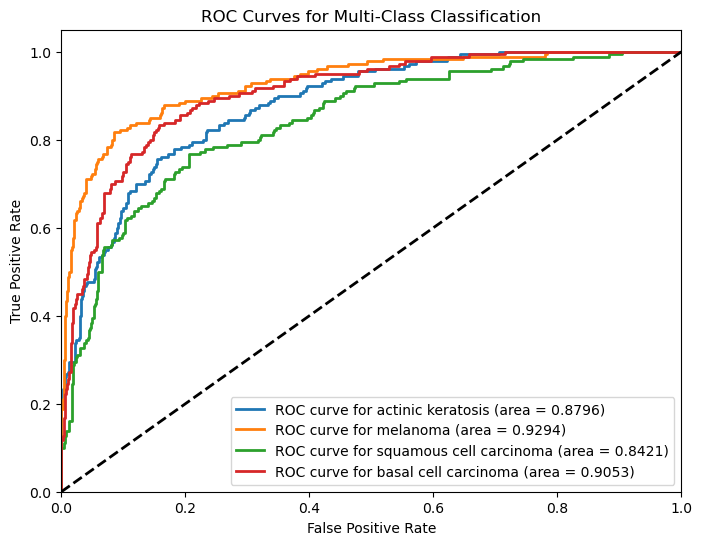

In [191]:
# Usage
plot_roc_auc(model, test_loader, device, label_names)

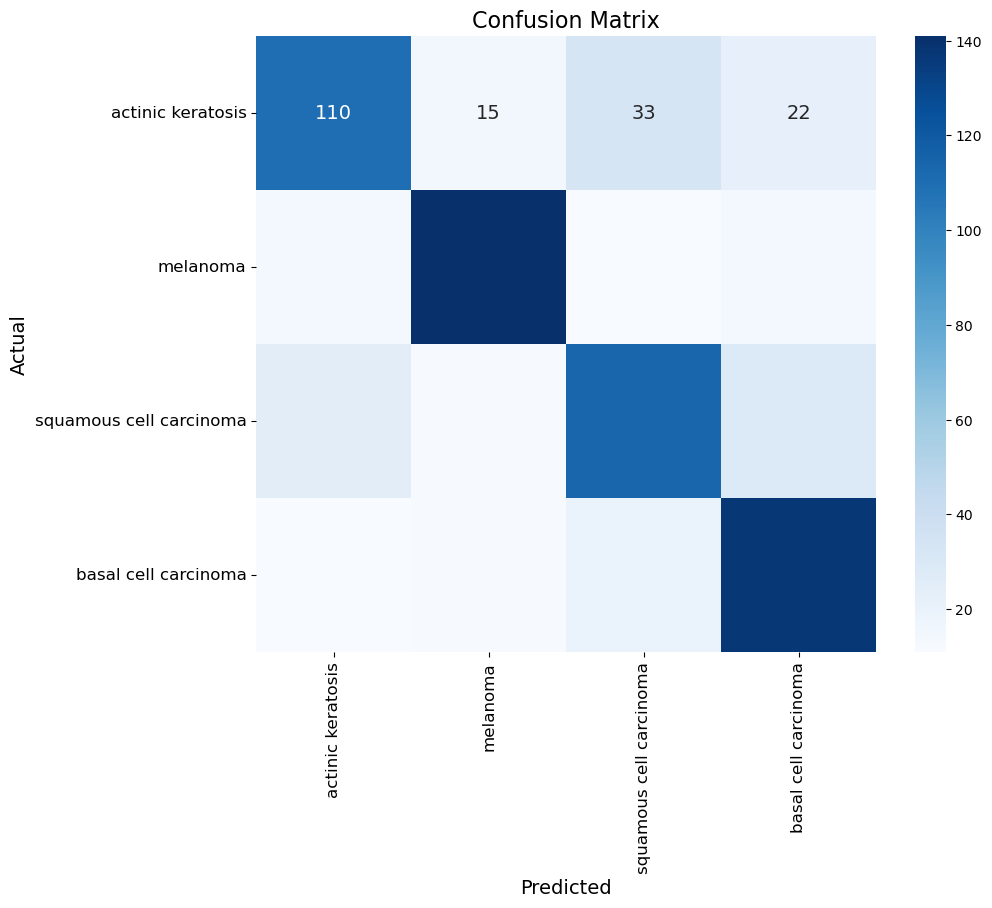

In [183]:
plot_confusion_matrix(model, test_loader, device, label_names)

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, test_loader, device, label_names):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names, 
                annot_kws={"size": 16}, cbar=False)  # Increased font size for annotations
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()


In [ ]:
import torch
torch.cuda.empty_cache()


In [60]:
import torch
import torch.optim as optim
from torch import nn
import time 
# Initialize the SE-ResNeXt101 model
num_classes = 4  # Only 4 classes: actinic keratosis, melanoma, squamous cell carcinoma, basal cell carcinoma
model_name = 'seresnext101'

# Initialize the custom SE-ResNeXt101 model with dropout
model = SEResNeXt101Custom(num_classes=num_classes)

# Move the model to the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Ensure that the final classification layer is always trainable
for param in model.fc.parameters():
    param.requires_grad = True

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss is typically used for multi-class classification

# Initialize the optimizer
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001, weight_decay=1e-4)

# Create data loaders using the correct paths
train_loader, test_loader = get_data_loaders(
    train_metadata_path=train_metadata_path,
    train_image_folder=train_image_folder,
    test_metadata_path=test_metadata_path,
    test_image_folder=test_image_folder,
    model_name=model_name,
    batch_size=16,  # You can adjust the batch size as needed
    num_workers=0
)

# Train the model using the fine-tuning function
train_model_with_refreezing(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=50,  # Total number of epochs
    unfreeze_epoch=10,  # Unfreeze layers starting at epoch 10
    refreeze_epoch=30,  # Refreeze layers at epoch 30 to avoid overfitting
    num_unfrozen_layers=4  # Fine-tune the last 4 layers
)


All layers are frozen.
Epoch 1/50, Train Loss: 1.3582, Train Accuracy: 34.19%
Epoch 1/50, Test Loss: 1.2928, Test Accuracy: 41.81%, Time: 206.22 seconds
Epoch 2/50, Train Loss: 1.2649, Train Accuracy: 42.89%
Epoch 2/50, Test Loss: 1.2385, Test Accuracy: 47.36%, Time: 205.82 seconds
Epoch 3/50, Train Loss: 1.2031, Train Accuracy: 46.36%
Epoch 3/50, Test Loss: 1.1990, Test Accuracy: 48.47%, Time: 205.62 seconds
Epoch 4/50, Train Loss: 1.1699, Train Accuracy: 49.11%
Epoch 4/50, Test Loss: 1.1691, Test Accuracy: 50.00%, Time: 207.24 seconds
Epoch 5/50, Train Loss: 1.1423, Train Accuracy: 50.97%
Epoch 5/50, Test Loss: 1.1535, Test Accuracy: 50.28%, Time: 206.93 seconds
Epoch 6/50, Train Loss: 1.1203, Train Accuracy: 52.86%
Epoch 6/50, Test Loss: 1.1471, Test Accuracy: 50.00%, Time: 205.55 seconds
Epoch 7/50, Train Loss: 1.0995, Train Accuracy: 52.08%
Epoch 7/50, Test Loss: 1.1370, Test Accuracy: 50.69%, Time: 206.26 seconds
Epoch 8/50, Train Loss: 1.0956, Train Accuracy: 53.42%
Epoch 8/50, 

In [61]:

label_names = ['actinic keratosis', 'melanoma', 'squamous cell carcinoma', 'basal cell carcinoma']
avg_loss, accuracy, report = evaluate_model_with_metrics(model, test_loader, criterion, device, label_names)
print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")
print(report)

Test Loss: 1.0981, Test Accuracy: 73.75%
                         precision    recall  f1-score   support

      actinic keratosis       0.68      0.68      0.68       180
               melanoma       0.82      0.78      0.80       180
squamous cell carcinoma       0.76      0.67      0.71       180
   basal cell carcinoma       0.70      0.82      0.75       180

               accuracy                           0.74       720
              macro avg       0.74      0.74      0.74       720
           weighted avg       0.74      0.74      0.74       720



In [62]:
# Calculate AUC
auc_score = calculate_roc_auc(model, test_loader, device)

# Print individual AUC scores for each class
for i, label_name in enumerate(label_names):
    print(f"ROC-AUC Score for {label_name}: {auc_score[i]:.4f}")
    
# Optionally, you can also print the average AUC across all classes
mean_auc = sum(auc_score) / len(auc_score)
print(f"\nMean ROC-AUC Score: {mean_auc:.4f}")


ROC-AUC Score for actinic keratosis: 0.8789
ROC-AUC Score for melanoma: 0.9557
ROC-AUC Score for squamous cell carcinoma: 0.8757
ROC-AUC Score for basal cell carcinoma: 0.9251

Mean ROC-AUC Score: 0.9088


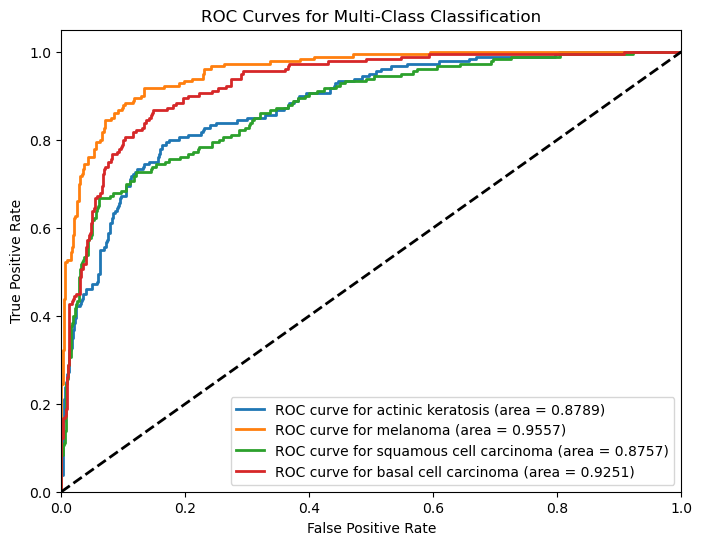

In [63]:
plot_roc_auc(model, test_loader, device, label_names)

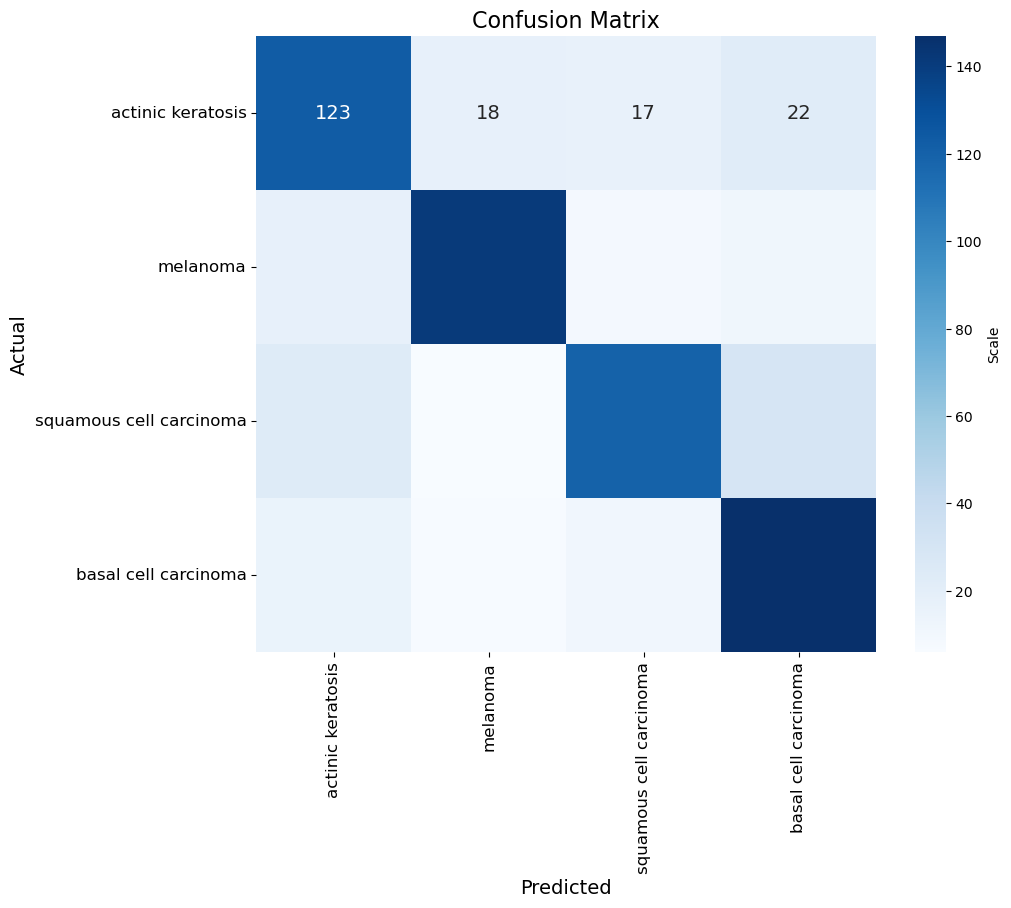

In [64]:
plot_confusion_matrix(model, test_loader, device, label_names)

In [70]:
# Save the SE-ResNeXt101 model
torch.save(model.state_dict(), r'C:\Users\ayush\Downloads\modelss\skin_disease_detection_seresnext101.pth')


In [239]:
import torch
import torch.optim as optim
from torch import nn

# Initialize the EfficientNet-B7 model
num_classes = 4  # Only 4 classes: actinic keratosis, melanoma, squamous cell carcinoma, basal cell carcinoma
model_name = 'efficientnet_b7'

# Initialize the custom EfficientNet-B7 model with dropout
model = EfficientNetB7Custom(num_classes=num_classes)

# Move the model to the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Ensure that the final classification layer is always trainable
for param in model.fc.parameters():
    param.requires_grad = True

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss is typically used for multi-class classification

# Initialize the optimizer
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001, weight_decay=1e-4)

# Create data loaders using the correct paths
train_loader, test_loader = get_data_loaders(
    train_metadata_path=train_metadata_path,
    train_image_folder=train_image_folder,
    test_metadata_path=test_metadata_path,
    test_image_folder=test_image_folder,
    model_name=model_name,
    batch_size=32,  # You can adjust the batch size as needed
    num_workers=0
)

# Train the model using the fine-tuning function
train_model_with_refreezing(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=50,  # Total number of epochs
    unfreeze_epoch=10,  # Unfreeze layers starting at epoch 10
    refreeze_epoch=30,  # Refreeze layers at epoch 30 to avoid overfitting
    num_unfrozen_layers=4  # Fine-tune the last 4 layers
)


All layers are frozen.
Epoch 1/50, Train Loss: 1.3986, Train Accuracy: 27.50%
Epoch 1/50, Test Loss: 2.8928, Test Accuracy: 28.33%, Time: 5094.32 seconds


KeyboardInterrupt: 

In [ ]:

label_names = ['actinic keratosis', 'melanoma', 'squamous cell carcinoma', 'basal cell carcinoma']
avg_loss, accuracy, report = evaluate_model_with_metrics(model, test_loader, criterion, device, label_names)
print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")
print(report)

In [ ]:
# Calculate AUC
auc_score = calculate_roc_auc(model, test_loader, device)

# Print individual AUC scores for each class
for i, label_name in enumerate(label_names):
    print(f"ROC-AUC Score for {label_name}: {auc_score[i]:.4f}")
    
# Optionally, you can also print the average AUC across all classes
mean_auc = sum(auc_score) / len(auc_score)
print(f"\nMean ROC-AUC Score: {mean_auc:.4f}")


In [ ]:
plot_roc_auc(model, test_loader, device, label_names)

In [ ]:
plot_confusion_matrix(model, test_loader, device, label_names)

In [18]:
import torch
torch.cuda.empty_cache()

In [19]:
import torch
import torch.optim as optim
from torch import nn
import time

# Initialize the EfficientNet-B0 model
num_classes = 4  # Only 4 classes: actinic keratosis, melanoma, squamous cell carcinoma, basal cell carcinoma
model_name = 'efficientnet_b0'

# Initialize the custom EfficientNet-B0 model with dropout
model = EfficientNetB0Custom(num_classes=num_classes)

# Move the model to the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Ensure that the final classification layer is always trainable
for param in model.fc.parameters():
    param.requires_grad = True

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss is typically used for multi-class classification

# Initialize the optimizer
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001, weight_decay=1e-4)

# Create data loaders using the correct paths
train_loader, test_loader = get_data_loaders(
    train_metadata_path=train_metadata_path,
    train_image_folder=train_image_folder,
    test_metadata_path=test_metadata_path,
    test_image_folder=test_image_folder,
    model_name=model_name,  # Ensure EfficientNet-B0 input size is 224x224
    batch_size=16,
    num_workers=0
)

# Train the model using the fine-tuning function
train_model_with_refreezing(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=50,  # Total number of epochs
    unfreeze_epoch=10,  # Unfreeze layers starting at epoch 10
    refreeze_epoch=30,  # Refreeze layers at epoch 30 to avoid overfitting
    num_unfrozen_layers=4  # Fine-tune the last 4 layers
)


C:\Users\ayush\anaconda31\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ayush\anaconda31\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Unknown model name 'efficientnet_b0'. Defaulting to 224x224 input size.
All layers are frozen.
Epoch 1/50, Train Loss: 1.3440, Train Accuracy: 34.58%
Epoch 1/50, Test Loss: 1.2966, Test Accuracy: 41.94%, Time: 218.12 seconds
Epoch 2/50, Train Loss: 1.2634, Train Accuracy: 44.33%
Epoch 2/50, Test Loss: 1.2336, Test Accuracy: 47.78%, Time: 210.70 seconds
Epoch 3/50, Train Loss: 1.2107, Train Accuracy: 47.11%
Epoch 3/50, Test Loss: 1.1961, Test Accuracy: 50.56%, Time: 207.06 seconds
Epoch 4/50, Train Loss: 1.1727, Train Accuracy: 50.33%
Epoch 4/50, Test Loss: 1.1662, Test Accuracy: 48.61%, Time: 204.62 seconds
Epoch 5/50, Train Loss: 1.1473, Train Accuracy: 51.06%
Epoch 5/50, Test Loss: 1.1409, Test Accuracy: 51.11%, Time: 205.66 seconds
Epoch 6/50, Train Loss: 1.1323, Train Accuracy: 51.58%
Epoch 6/50, Test Loss: 1.1225, Test Accuracy: 50.69%, Time: 205.28 seconds
Epoch 7/50, Train Loss: 1.1132, Train Accuracy: 53.11%
Epoch 7/50, Test Loss: 1.1166, Test Accuracy: 51.53%, Time: 205.46 sec

In [20]:

label_names = ['actinic keratosis', 'melanoma', 'squamous cell carcinoma', 'basal cell carcinoma']
avg_loss, accuracy, report = evaluate_model_with_metrics(model, test_loader, criterion, device, label_names)
print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")
print(report)

Test Loss: 1.0307, Test Accuracy: 71.39%
                         precision    recall  f1-score   support

      actinic keratosis       0.66      0.72      0.69       180
               melanoma       0.79      0.81      0.80       180
squamous cell carcinoma       0.66      0.61      0.63       180
   basal cell carcinoma       0.75      0.73      0.74       180

               accuracy                           0.71       720
              macro avg       0.71      0.71      0.71       720
           weighted avg       0.71      0.71      0.71       720



In [21]:
# Calculate AUC
auc_score = calculate_roc_auc(model, test_loader, device)

# Print individual AUC scores for each class
for i, label_name in enumerate(label_names):
    print(f"ROC-AUC Score for {label_name}: {auc_score[i]:.4f}")
    
# Optionally, you can also print the average AUC across all classes
mean_auc = sum(auc_score) / len(auc_score)
print(f"\nMean ROC-AUC Score: {mean_auc:.4f}")


ROC-AUC Score for actinic keratosis: 0.9041
ROC-AUC Score for melanoma: 0.9534
ROC-AUC Score for squamous cell carcinoma: 0.8772
ROC-AUC Score for basal cell carcinoma: 0.9320

Mean ROC-AUC Score: 0.9167


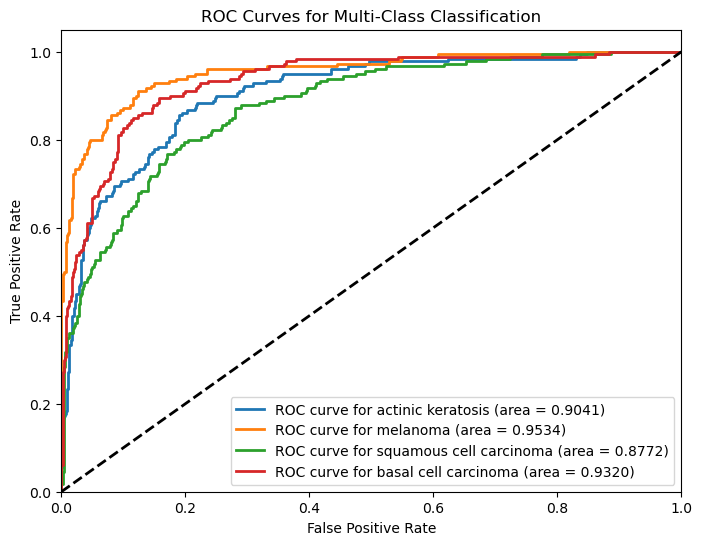

In [22]:
plot_roc_auc(model, test_loader, device, label_names)

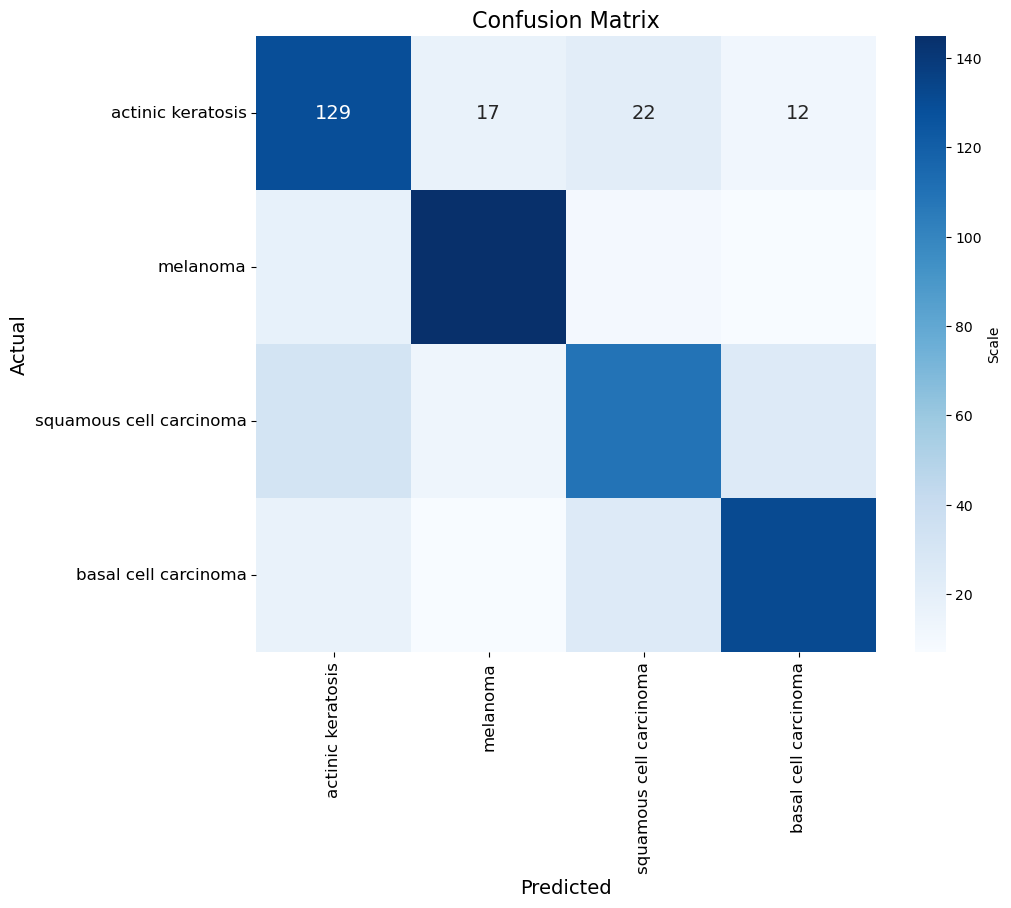

In [23]:
plot_confusion_matrix(model, test_loader, device, label_names)

In [24]:
torch.save(model.state_dict(), r'C:\Users\ayush\Downloads\modelss\skin_disease_detection_efficientnetb0.pth')


In [25]:
import torch
torch.cuda.empty_cache()

In [26]:
import torch
import torch.optim as optim
from torch import nn
import time

# Initialize the DenseNet-121 model
num_classes = 4  # Only 4 classes: actinic keratosis, melanoma, squamous cell carcinoma, basal cell carcinoma
model_name = 'densenet121'

# Initialize the custom DenseNet-121 model with dropout
model = DenseNet121Custom(num_classes=num_classes)

# Move the model to the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Ensure that the final classification layer is always trainable
for param in model.fc.parameters():
    param.requires_grad = True

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss is typically used for multi-class classification

# Initialize the optimizer
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001, weight_decay=1e-4)

# Create data loaders using the correct paths
train_loader, test_loader = get_data_loaders(
    train_metadata_path=train_metadata_path,
    train_image_folder=train_image_folder,
    test_metadata_path=test_metadata_path,
    test_image_folder=test_image_folder,
    model_name=model_name,  # Ensure DenseNet-121 input size is 224x224
    batch_size=16,
    num_workers=0
)

# Train the model using the fine-tuning function
train_model_with_refreezing(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=50,  # Total number of epochs
    unfreeze_epoch=10,  # Unfreeze layers starting at epoch 10
    refreeze_epoch=30,  # Refreeze layers at epoch 30 to avoid overfitting
    num_unfrozen_layers=4  # Fine-tune the last 4 layers
)


C:\Users\ayush\anaconda31\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ayush\anaconda31\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Unknown model name 'densenet121'. Defaulting to 224x224 input size.
All layers are frozen.
Epoch 1/50, Train Loss: 1.3941, Train Accuracy: 29.94%
Epoch 1/50, Test Loss: 1.2973, Test Accuracy: 41.67%, Time: 207.78 seconds
Epoch 2/50, Train Loss: 1.2961, Train Accuracy: 39.64%
Epoch 2/50, Test Loss: 1.2392, Test Accuracy: 44.03%, Time: 209.80 seconds
Epoch 3/50, Train Loss: 1.2493, Train Accuracy: 42.14%
Epoch 3/50, Test Loss: 1.2040, Test Accuracy: 46.39%, Time: 209.18 seconds
Epoch 4/50, Train Loss: 1.2139, Train Accuracy: 44.94%
Epoch 4/50, Test Loss: 1.1685, Test Accuracy: 49.86%, Time: 209.47 seconds
Epoch 5/50, Train Loss: 1.1968, Train Accuracy: 45.17%
Epoch 5/50, Test Loss: 1.1471, Test Accuracy: 50.69%, Time: 229.55 seconds
Epoch 6/50, Train Loss: 1.1802, Train Accuracy: 47.75%
Epoch 6/50, Test Loss: 1.1373, Test Accuracy: 50.69%, Time: 207.99 seconds
Epoch 7/50, Train Loss: 1.1543, Train Accuracy: 48.33%
Epoch 7/50, Test Loss: 1.1238, Test Accuracy: 51.67%, Time: 210.49 seconds

In [27]:

label_names = ['actinic keratosis', 'melanoma', 'squamous cell carcinoma', 'basal cell carcinoma']
avg_loss, accuracy, report = evaluate_model_with_metrics(model, test_loader, criterion, device, label_names)
print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")
print(report)

Test Loss: 0.9903, Test Accuracy: 74.03%
                         precision    recall  f1-score   support

      actinic keratosis       0.71      0.71      0.71       180
               melanoma       0.79      0.84      0.81       180
squamous cell carcinoma       0.69      0.70      0.69       180
   basal cell carcinoma       0.78      0.71      0.74       180

               accuracy                           0.74       720
              macro avg       0.74      0.74      0.74       720
           weighted avg       0.74      0.74      0.74       720



In [28]:
# Calculate AUC
auc_score = calculate_roc_auc(model, test_loader, device)

# Print individual AUC scores for each class
for i, label_name in enumerate(label_names):
    print(f"ROC-AUC Score for {label_name}: {auc_score[i]:.4f}")
    
# Optionally, you can also print the average AUC across all classes
mean_auc = sum(auc_score) / len(auc_score)
print(f"\nMean ROC-AUC Score: {mean_auc:.4f}")


ROC-AUC Score for actinic keratosis: 0.8910
ROC-AUC Score for melanoma: 0.9553
ROC-AUC Score for squamous cell carcinoma: 0.8934
ROC-AUC Score for basal cell carcinoma: 0.9185

Mean ROC-AUC Score: 0.9146


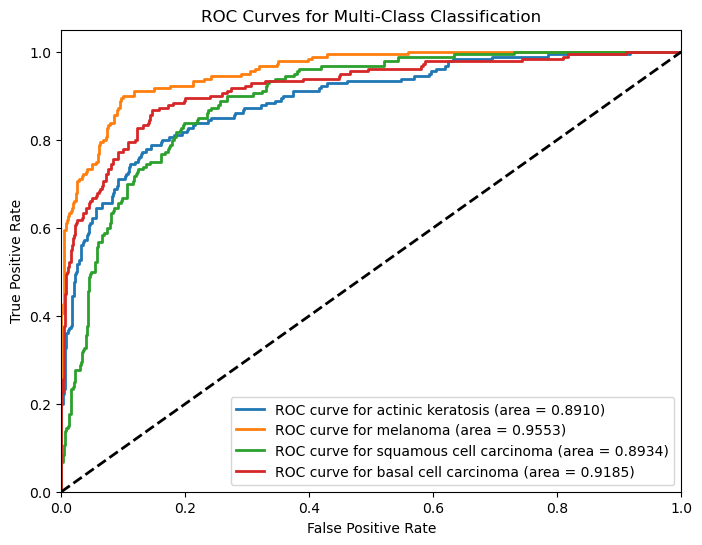

In [29]:
plot_roc_auc(model, test_loader, device, label_names)

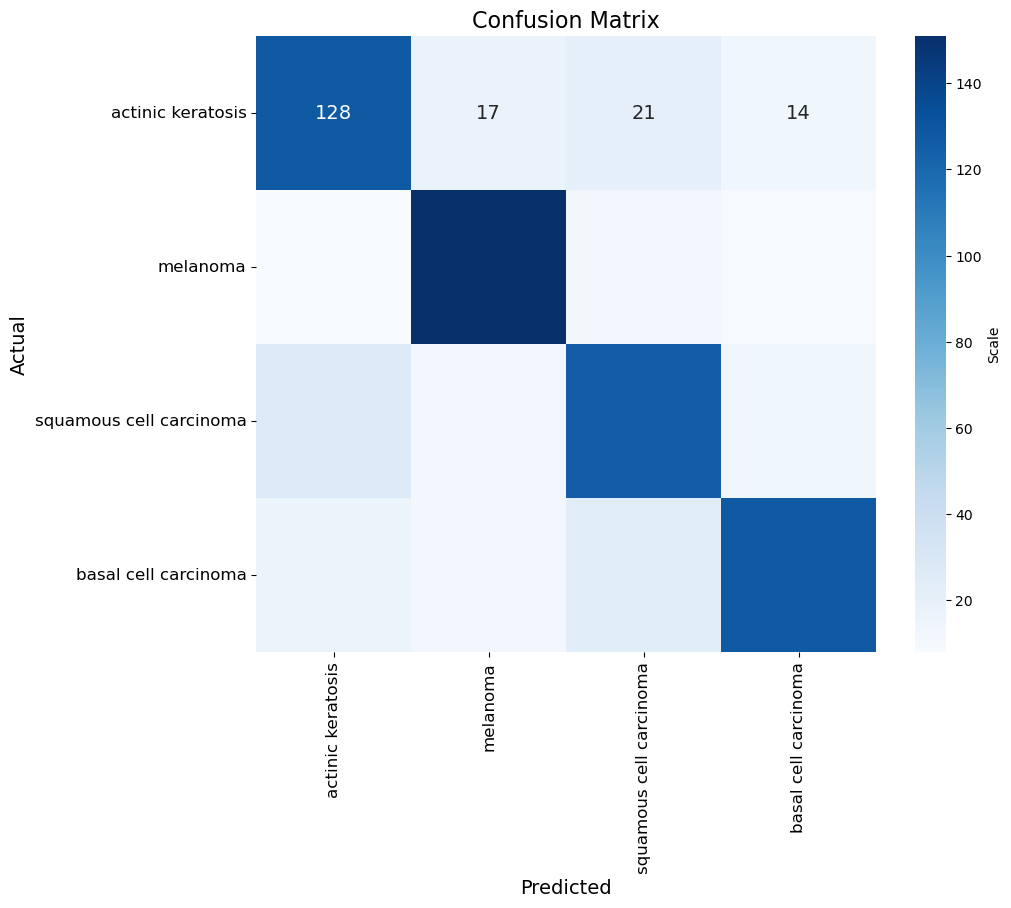

In [30]:
plot_confusion_matrix(model, test_loader, device, label_names)

In [31]:
torch.save(model.state_dict(), r'C:\Users\ayush\Downloads\modelss\skin_disease_detection_densenet121.pth')


In [90]:
import torch
torch.cuda.empty_cache()

In [91]:
import torch
import torch.optim as optim
from torch import nn
import time

# Initialize the SE-DenseNet121 model for skin disease classification
num_classes = 4  # Only 4 classes: actinic keratosis, melanoma, squamous cell carcinoma, basal cell carcinoma
model_name = 'sedensenet121'

# Initialize the custom SE-DenseNet121 model with dropout
model = SEDenseNet121(num_classes=num_classes)

# Move the model to the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Ensure that the final classification layer is always trainable
for param in model.densenet.classifier.parameters():  # Access classifier inside densenet
    param.requires_grad = True

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss is typically used for multi-class classification
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001, weight_decay=1e-4)

# Create data loaders using the correct paths
train_loader, test_loader = get_data_loaders(
    train_metadata_path=train_metadata_path,
    train_image_folder=train_image_folder,
    test_metadata_path=test_metadata_path,
    test_image_folder=test_image_folder,
    model_name=model_name,
    batch_size=16,  # Adjust the batch size if needed
    num_workers=0
)

# Train the model using the fine-tuning function
train_model_with_refreezing(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=50,  # Total number of epochs
    unfreeze_epoch=10,  # Unfreeze layers starting at epoch 10
    refreeze_epoch=30,  # Refreeze layers at epoch 30 to avoid overfitting
    num_unfrozen_layers=4  # Fine-tune the last 4 layers
)


C:\Users\ayush\anaconda31\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\ayush\anaconda31\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Unknown model name 'sedensenet121'. Defaulting to 224x224 input size.
All layers are frozen.
Epoch 1/50, Train Loss: 1.3259, Train Accuracy: 38.36%
Epoch 1/50, Test Loss: 1.2816, Test Accuracy: 44.31%, Time: 205.18 seconds
Epoch 2/50, Train Loss: 1.2418, Train Accuracy: 46.56%
Epoch 2/50, Test Loss: 1.2221, Test Accuracy: 48.47%, Time: 204.05 seconds
Epoch 3/50, Train Loss: 1.1920, Train Accuracy: 49.75%
Epoch 3/50, Test Loss: 1.1830, Test Accuracy: 50.83%, Time: 204.85 seconds
Epoch 4/50, Train Loss: 1.1587, Train Accuracy: 51.56%
Epoch 4/50, Test Loss: 1.1572, Test Accuracy: 51.25%, Time: 205.39 seconds
Epoch 5/50, Train Loss: 1.1334, Train Accuracy: 52.75%
Epoch 5/50, Test Loss: 1.1327, Test Accuracy: 53.06%, Time: 204.78 seconds
Epoch 6/50, Train Loss: 1.1124, Train Accuracy: 53.83%
Epoch 6/50, Test Loss: 1.1197, Test Accuracy: 53.19%, Time: 204.69 seconds
Epoch 7/50, Train Loss: 1.0955, Train Accuracy: 54.44%
Epoch 7/50, Test Loss: 1.1054, Test Accuracy: 52.64%, Time: 205.68 secon

In [37]:
print(model)


SEDenseNet121(
  (densenet): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momen

In [92]:

label_names = ['actinic keratosis', 'melanoma', 'squamous cell carcinoma', 'basal cell carcinoma']
avg_loss, accuracy, report = evaluate_model_with_metrics(model, test_loader, criterion, device, label_names)
print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")
print(report)

Test Loss: 0.9511, Test Accuracy: 59.58%
                         precision    recall  f1-score   support

      actinic keratosis       0.51      0.61      0.55       180
               melanoma       0.73      0.69      0.71       180
squamous cell carcinoma       0.56      0.49      0.53       180
   basal cell carcinoma       0.60      0.59      0.60       180

               accuracy                           0.60       720
              macro avg       0.60      0.60      0.60       720
           weighted avg       0.60      0.60      0.60       720



In [93]:
# Calculate AUC
auc_score = calculate_roc_auc(model, test_loader, device)

# Print individual AUC scores for each class
for i, label_name in enumerate(label_names):
    print(f"ROC-AUC Score for {label_name}: {auc_score[i]:.4f}")
    
# Optionally, you can also print the average AUC across all classes
mean_auc = sum(auc_score) / len(auc_score)
print(f"\nMean ROC-AUC Score: {mean_auc:.4f}")


ROC-AUC Score for actinic keratosis: 0.7957
ROC-AUC Score for melanoma: 0.9072
ROC-AUC Score for squamous cell carcinoma: 0.7970
ROC-AUC Score for basal cell carcinoma: 0.8461

Mean ROC-AUC Score: 0.8365


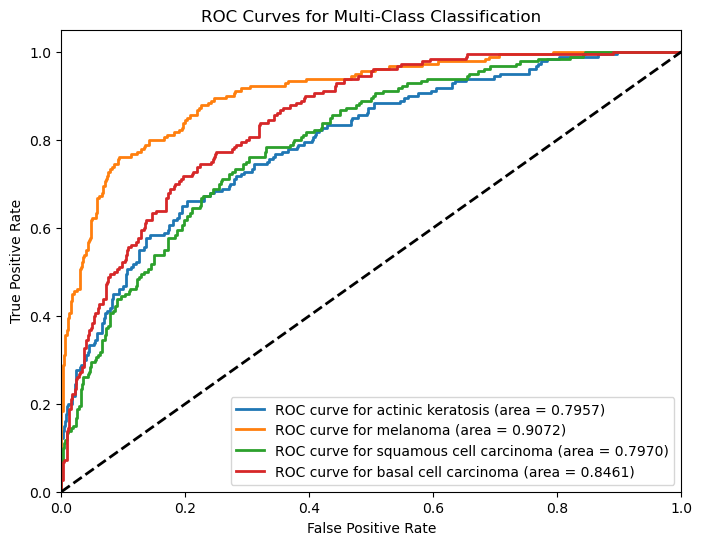

In [94]:
plot_roc_auc(model, test_loader, device, label_names)

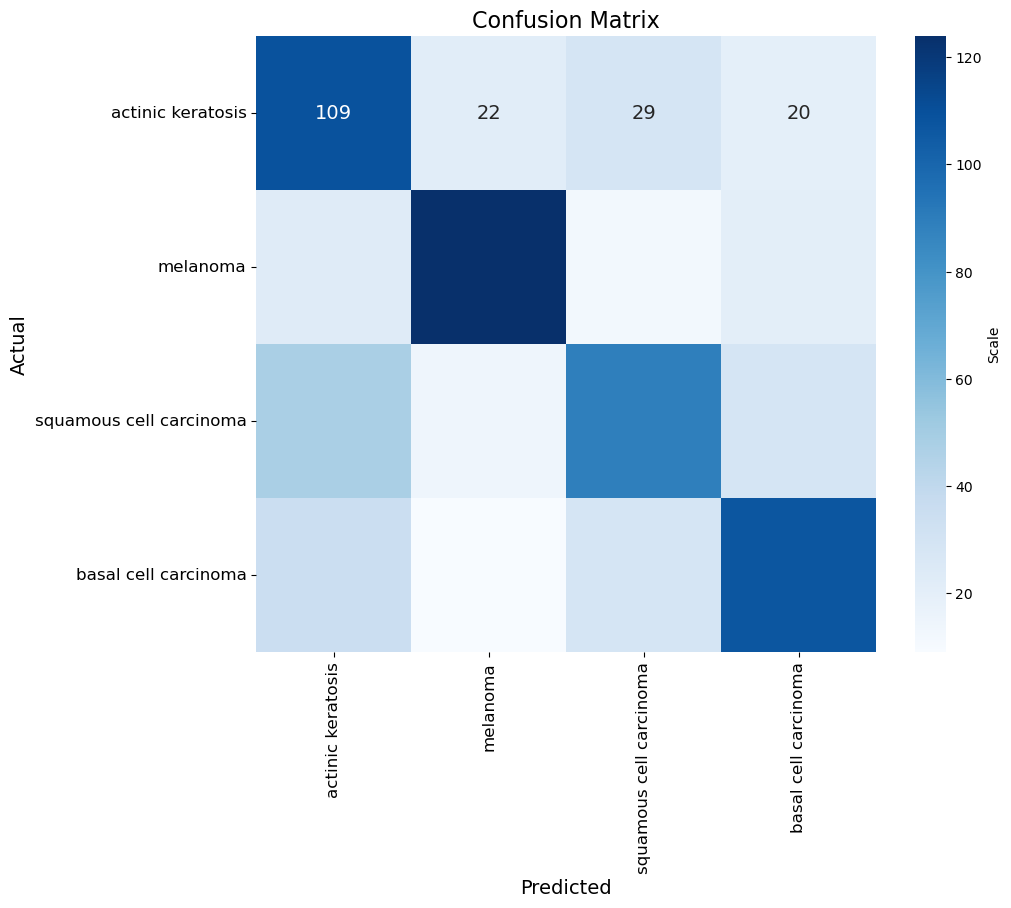

In [95]:
plot_confusion_matrix(model, test_loader, device, label_names)

In [96]:
# Save the model
torch.save(model.state_dict(), r'C:\Users\ayush\Downloads\modelss\skin_disease_detection_sedensenet121.pth')

In [ ]:
# Initialize the RegNetY-8GF model
num_classes = 4  # Only 4 classes: actinic keratosis, melanoma, squamous cell carcinoma, basal cell carcinoma
model_name = 'regnety_008'






In [97]:
import torch
torch.cuda.empty_cache()

In [98]:
# Initialize the RegNetY-8GF model
num_classes = 4  # Only 4 classes: actinic keratosis, melanoma, squamous cell carcinoma, basal cell carcinoma
model_name = 'regnety_008'




# Move the model to the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RegNetY8GFCustom(num_classes=num_classes).to(device)

# Ensure that the final classification layer is always trainable
for param in model.fc.parameters():  # Adjust 'fc' to the correct layer name for your RegNet model
    param.requires_grad = True

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss is typically used for multi-class classification
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001, weight_decay=1e-4)

# Helper functions for data loading, freezing layers, and training are assumed to be already defined

# Create data loaders using the correct paths
train_loader, test_loader = get_data_loaders(
    train_metadata_path=train_metadata_path,
    train_image_folder=train_image_folder,
    test_metadata_path=test_metadata_path,
    test_image_folder=test_image_folder,
    model_name='regnety_008',  # Ensure RegNetY input size is 224x224
    batch_size=16,  # Adjust batch size
    num_workers=0  # Adjust num_workers based on your system
)

# Train the model using the fine-tuning function
train_model_with_refreezing(
    model=model,
    train_loader=train_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    criterion=criterion,
    device=device,
    num_epochs=50,  # Total number of epochs
    unfreeze_epoch=10,  # Unfreeze layers starting at epoch 10
    refreeze_epoch=30,  # Refreeze layers at epoch 30 to avoid overfitting
    num_unfrozen_layers=4  # Fine-tune the last 4 layers
)

Unknown model name 'regnety_008'. Defaulting to 224x224 input size.
All layers are frozen.
Epoch 1/50, Train Loss: 1.3508, Train Accuracy: 47.00%
Epoch 1/50, Test Loss: 1.2311, Test Accuracy: 52.78%, Time: 207.87 seconds
Epoch 2/50, Train Loss: 0.9520, Train Accuracy: 62.22%
Epoch 2/50, Test Loss: 1.1297, Test Accuracy: 57.50%, Time: 207.58 seconds
Epoch 3/50, Train Loss: 0.7633, Train Accuracy: 69.44%
Epoch 3/50, Test Loss: 1.0866, Test Accuracy: 58.61%, Time: 206.32 seconds
Epoch 4/50, Train Loss: 0.6366, Train Accuracy: 76.17%
Epoch 4/50, Test Loss: 1.2173, Test Accuracy: 56.67%, Time: 205.55 seconds
Epoch 5/50, Train Loss: 0.5216, Train Accuracy: 80.25%
Epoch 5/50, Test Loss: 1.1720, Test Accuracy: 58.61%, Time: 205.23 seconds
Epoch 6/50, Train Loss: 0.4667, Train Accuracy: 81.78%
Epoch 6/50, Test Loss: 1.2751, Test Accuracy: 57.92%, Time: 216.62 seconds
Epoch 7/50, Train Loss: 0.4226, Train Accuracy: 83.97%
Epoch 7/50, Test Loss: 1.2088, Test Accuracy: 59.03%, Time: 206.23 seconds

In [61]:
import timm
timm.list_models(pretrained=True)


['bat_resnext26ts.ch_in1k',
 'beit_base_patch16_224.in22k_ft_in22k',
 'beit_base_patch16_224.in22k_ft_in22k_in1k',
 'beit_base_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_224.in22k_ft_in22k',
 'beit_large_patch16_224.in22k_ft_in22k_in1k',
 'beit_large_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_512.in22k_ft_in22k_in1k',
 'beitv2_base_patch16_224.in1k_ft_in1k',
 'beitv2_base_patch16_224.in1k_ft_in22k',
 'beitv2_base_patch16_224.in1k_ft_in22k_in1k',
 'beitv2_large_patch16_224.in1k_ft_in1k',
 'beitv2_large_patch16_224.in1k_ft_in22k',
 'beitv2_large_patch16_224.in1k_ft_in22k_in1k',
 'botnet26t_256.c1_in1k',
 'caformer_b36.sail_in1k',
 'caformer_b36.sail_in1k_384',
 'caformer_b36.sail_in22k',
 'caformer_b36.sail_in22k_ft_in1k',
 'caformer_b36.sail_in22k_ft_in1k_384',
 'caformer_m36.sail_in1k',
 'caformer_m36.sail_in1k_384',
 'caformer_m36.sail_in22k',
 'caformer_m36.sail_in22k_ft_in1k',
 'caformer_m36.sail_in22k_ft_in1k_384',
 'caformer_s18.sail_in1k',
 'caformer_s18.s

In [99]:

label_names = ['actinic keratosis', 'melanoma', 'squamous cell carcinoma', 'basal cell carcinoma']
avg_loss, accuracy, report = evaluate_model_with_metrics(model, test_loader, criterion, device, label_names)
print(f"Test Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")
print(report)

Test Loss: 1.5535, Test Accuracy: 58.47%
                         precision    recall  f1-score   support

      actinic keratosis       0.52      0.66      0.58       180
               melanoma       0.68      0.66      0.67       180
squamous cell carcinoma       0.55      0.44      0.49       180
   basal cell carcinoma       0.61      0.58      0.60       180

               accuracy                           0.58       720
              macro avg       0.59      0.58      0.58       720
           weighted avg       0.59      0.58      0.58       720



In [100]:
# Calculate AUC
auc_score = calculate_roc_auc(model, test_loader, device)

# Print individual AUC scores for each class
for i, label_name in enumerate(label_names):
    print(f"ROC-AUC Score for {label_name}: {auc_score[i]:.4f}")
    
# Optionally, you can also print the average AUC across all classes
mean_auc = sum(auc_score) / len(auc_score)
print(f"\nMean ROC-AUC Score: {mean_auc:.4f}")


ROC-AUC Score for actinic keratosis: 0.8046
ROC-AUC Score for melanoma: 0.8964
ROC-AUC Score for squamous cell carcinoma: 0.7774
ROC-AUC Score for basal cell carcinoma: 0.8562

Mean ROC-AUC Score: 0.8337


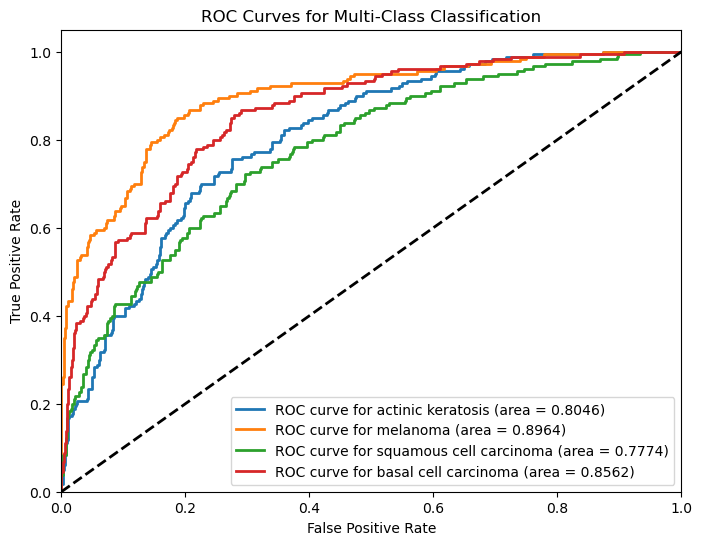

In [101]:
plot_roc_auc(model, test_loader, device, label_names)

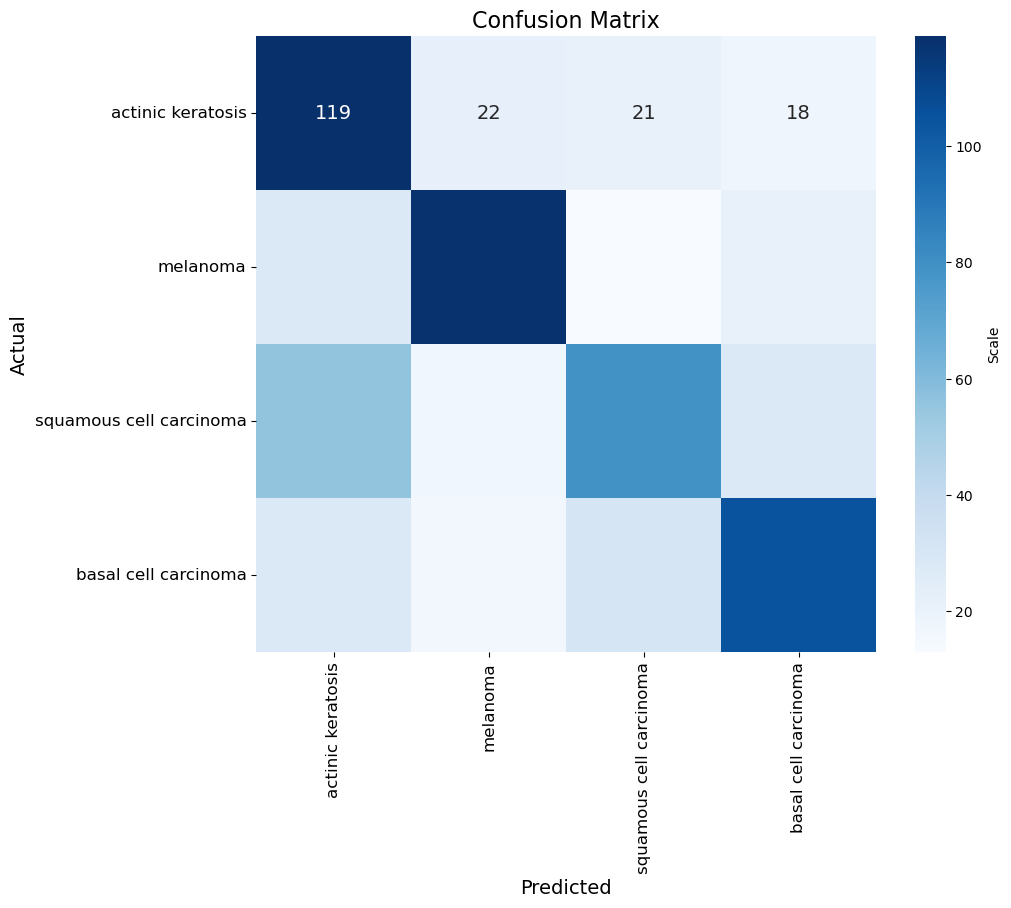

In [102]:
plot_confusion_matrix(model, test_loader, device, label_names)

In [103]:
torch.save(model.state_dict(), r'C:\Users\ayush\Downloads\modelss\skin_disease_detection_regnety8gf.pth')
